<a href="https://colab.research.google.com/github/caiogasparine/AIDI1006-google-colab/blob/main/AIDI1006_thumbnails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade azure-cognitiveservices-vision-computervision

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time

from google.colab import drive
drive.mount('/content/drive')

# subscription_key = "PASTE_YOUR_SUBSCRIPTION_KEY_HERE"
# endpoint = "PASTE_YOUR_ENDPOINT_HERE"
subscription_key = "43773aab623c4be288c3a279aa6ab764"
endpoint = "https://computer-vision-ai1006.cognitiveservices.azure.com/"

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

# Quickstart variables // These variables are shared by several examples
remote_image_url = "https://homepages.cae.wisc.edu/~ece533/images/airplane.png"
remote_image_url = "https://cdn.motor1.com/images/mgl/pbbL7J/s3/2023-ferrari-purosangue.jpg"
local_image_path = "/content/drive/My Drive/images/kim.jpg"
local_image_path = "/content/drive/My Drive/images/objects.jpg"

# Generate Thumbnail - This example creates a thumbnail from both a local and URL image.
print("===== Generate Thumbnail =====")

# Generate a thumbnail from a local image
local_image_path = os.path.join (local_image_path)
local_image_thumb = open(local_image_path, "rb")

print("Generating thumbnail from a local image...")
# Call the API with a local image, set the width/height if desired (pixels)
# Returns a Generator object, a thumbnail image binary (list).
thumb_local = computervision_client.generate_thumbnail_in_stream(100, 100, local_image_thumb, True)

# Write the image binary to file
with open("thumb_local.png", "wb") as f:
    for chunk in thumb_local:
        f.write(chunk)

# Uncomment/use this if you are writing many images as thumbnails from a list
for i, image in enumerate(thumb_local, start=0):
    with open('thumb_{0}.jpg'.format(i), 'wb') as f:
        f.write(image)
print("Thumbnail saved to local folder.")
print()

# Generate a thumbnail from a URL image
print("Generating thumbnail from a URL image...")
# Returns a Generator object, a thumbnail image binary (list).
thumb_remote = computervision_client.generate_thumbnail(
    100, 100, remote_image_url, True)

# Write the image binary to file
with open("thumb_remote.png", "wb") as f:
    for chunk in thumb_remote:
        f.write(chunk)
print("Thumbnail saved to local folder.")

# Uncomment/use this if you are writing many images as thumbnails from a list
for i, image in enumerate(thumb_remote, start=0):
    with open('thumb_{0}.jpg'.format(i), 'wb') as f:
        f.write(image)
print()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
===== Generate Thumbnail =====
Generating thumbnail from a local image...
Thumbnail saved to local folder.

Generating thumbnail from a URL image...
Thumbnail saved to local folder.



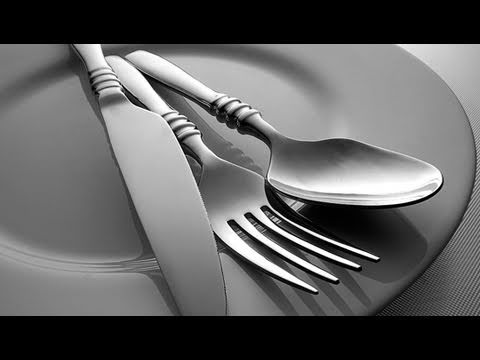

In [ ]:
# Read the image stored in the Google Drive // Local image file
# ORIGINAL FILE ///

from google.colab.patches import cv2_imshow
import cv2 as cv
img = cv.imread(local_image_path)
cv2_imshow(img)

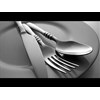

In [ ]:
# Read the image stored in the Google Drive // Local image file
# OUTPUT FILE // TRANSFORMED

from google.colab.patches import cv2_imshow
import cv2 as cv
img = cv.imread('thumb_local.png')
cv2_imshow(img)

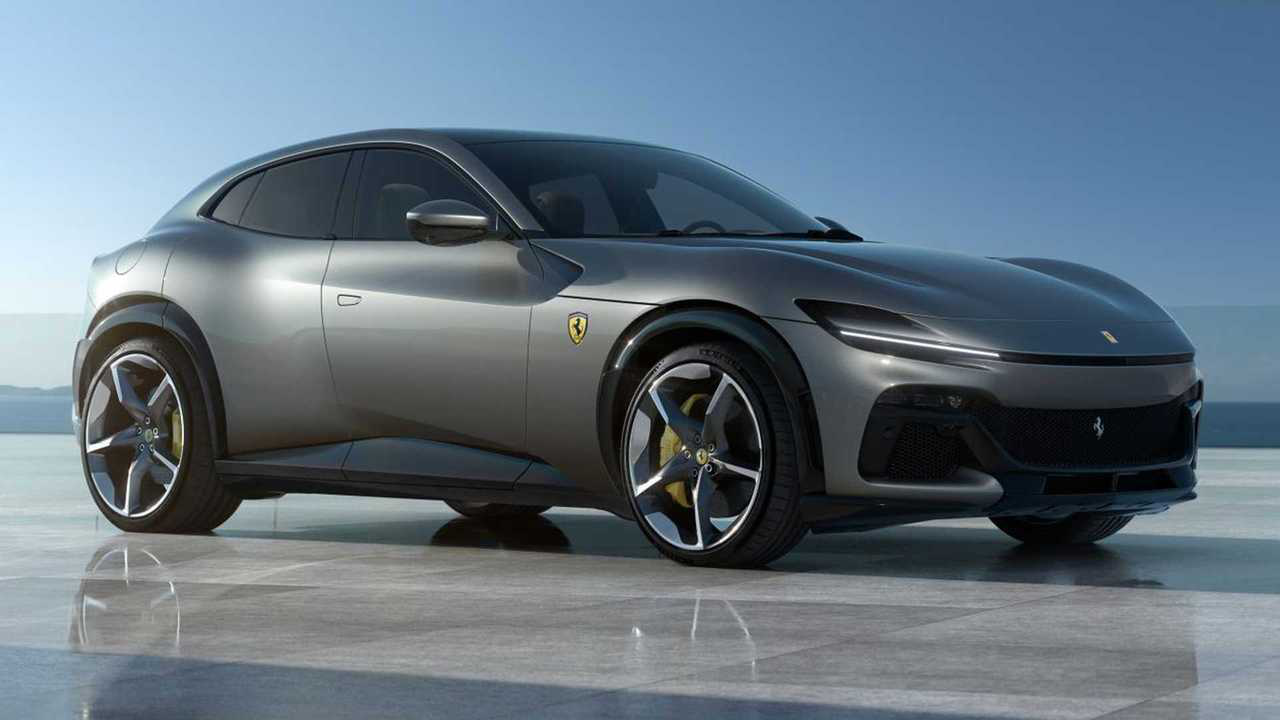

In [ ]:
# Read the image URL and print the image file (URL) // Remote image
# ORIGINAL FILE ///

from PIL import Image
import requests
img = Image.open(requests.get(remote_image_url, stream=True).raw)
img

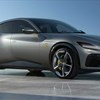

In [ ]:
# Read the image stored in the Google Drive // Local image file
# OUTPUT FILE // TRANSFORMED

from google.colab.patches import cv2_imshow
import cv2 as cv
img = cv.imread('thumb_remote.png')
cv2_imshow(img)